# Homework - Area Processing Part.1
1. Implement smoothing filters
    - Average filter, Gaussian filter, Median filter
    - Variable mask size
2. Eliminate some noises using either Gaussian filter and Median filter and Compare their performance (gray-scale image)
    - Gaussian noise + the original image
    - Salt-and-pepper noise + the original image
3. Apply average filter to given color image (Mean/Gaussian filter)
4. Apply High-boost filter to some images

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

1. Implement smoothing filters

Note : Gaussian kernel의 sigma(표준편차)가 어떻게 정의되는 것이 좋을지 모르겠습니다

In [17]:
from common.functions import convolution

def average_filter(img, k=3):
    mask_size = (2 * k + 1, 2 * k + 1)
    mean_kernel = np.full(mask_size, 1 / mask_size[0]**2)
    return convolution(img, mean_kernel)

def gaussian_kernel(k):
    sigma = k
    half = k // 2
    
    kernel = np.ones((k, k))
    kernel /= (2 * np.pi * sigma**2)
    kernel *= np.exp(-1 / sigma**2)
    
    for v in range(k):
        for u in range(k):
            kernel[v][u] *= np.exp((u - half)**2 + (v - half)**2)
    
    kernel /= kernel.sum()
    
    return kernel

def gaussian_filter(img, k=3):
    return convolution(img, gaussian_kernel(k))

def median_filter(img, k=3):
    filtered = np.zeros_like(img)

    for v in range(k, img.shape[0] - k):
        for u in range(k, img.shape[1] - k):
            filtered[v][u] = np.median(img[v-k:v+k, u-k:u+k])

    return filtered

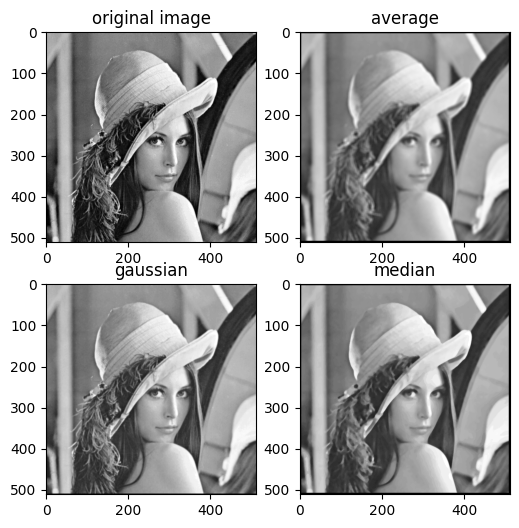

In [18]:
# Plot
img = cv2.imread('images/originals/lenna_color.bmp', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(6, 6))

plt.subplot(2, 2, 1)
plt.title('original image')
plt.imshow(img, cmap='gray')

plt.subplot(2, 2, 2)
plt.title('average')
plt.imshow(average_filter(img), cmap='gray')

plt.subplot(2, 2, 3)
plt.title('gaussian')
plt.imshow(gaussian_filter(img), cmap='gray')

plt.subplot(2, 2, 4)
plt.title('median')
plt.imshow(median_filter(img), cmap='gray')

plt.show()

2. Eliminate some noises using either Gaussian filter and Median filter and compare their performance

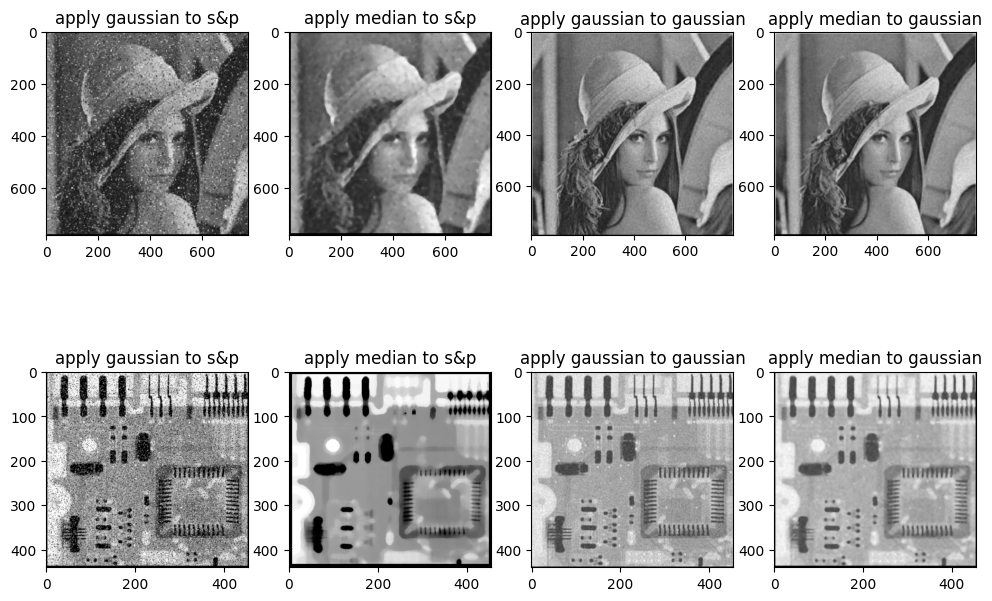

In [19]:
img1_saltpep = cv2.imread('images/lena-saltpep.png', cv2.IMREAD_GRAYSCALE)
img1_gaussian = cv2.imread('images/lena-gaussian-noise.png', cv2.IMREAD_GRAYSCALE)
img2_saltpep = cv2.imread('images/ckt-saltpep.jpg', cv2.IMREAD_GRAYSCALE)
img2_gaussian = cv2.imread('images/ckt-gaussian-noise.jpg', cv2.IMREAD_GRAYSCALE)

# Plot
plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
plt.title('apply gaussian to s&p')
plt.imshow(gaussian_filter(img1_saltpep, 7), cmap='gray')

plt.subplot(2, 4, 2)
plt.title('apply median to s&p')
plt.imshow(median_filter(img1_saltpep, 7), cmap='gray')

plt.subplot(2, 4, 3)
plt.title('apply gaussian to gaussian')
plt.imshow(gaussian_filter(img1_gaussian), cmap='gray')

plt.subplot(2, 4, 4)
plt.title('apply median to gaussian')
plt.imshow(median_filter(img1_gaussian), cmap='gray')

plt.subplot(2, 4, 5)
plt.title('apply gaussian to s&p')
plt.imshow(gaussian_filter(img2_saltpep, 7), cmap='gray')

plt.subplot(2, 4, 6)
plt.title('apply median to s&p')
plt.imshow(median_filter(img2_saltpep, 7), cmap='gray')

plt.subplot(2, 4, 7)
plt.title('apply gaussian to gaussian')
plt.imshow(gaussian_filter(img2_gaussian), cmap='gray')

plt.subplot(2, 4, 8)
plt.title('apply median to gaussian')
plt.imshow(median_filter(img2_gaussian), cmap='gray')

plt.show()

3. Apply average filter to given color image

In [20]:
def average_filter_intensity(img, k=3):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    filtered_v = average_filter(v).astype(np.uint8)
    filtered_img = cv2.merge((h, s, filtered_v))

    return cv2.cvtColor(filtered_img, cv2.COLOR_HSV2BGR)

def average_filter_rgb(img, k=3):
    b, g, r = cv2.split(img)

    filtered_b = average_filter(b).astype(np.uint8)
    filtered_g = average_filter(g).astype(np.uint8)
    filtered_r = average_filter(r).astype(np.uint8)

    filtered_img = cv2.merge((filtered_b, filtered_g, filtered_r))

    return filtered_img

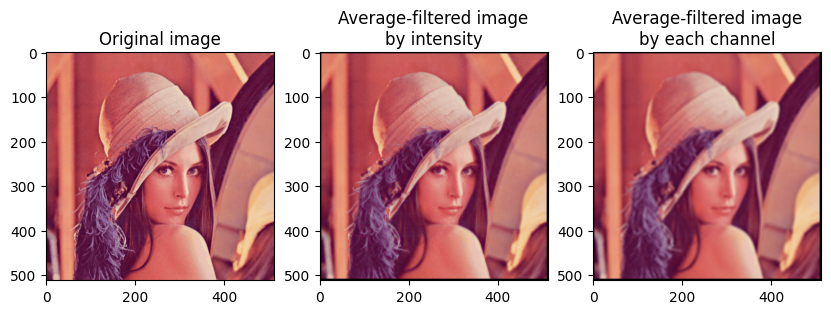

In [21]:
img = cv2.imread('images/originals/lenna_color.bmp', cv2.IMREAD_COLOR)
img_avg_intensity = average_filter_intensity(img)
img_avg_channel = average_filter_rgb(img)

# Plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title('Original image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title('Average-filtered image\nby intensity')
plt.imshow(cv2.cvtColor(img_avg_intensity, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 3)
plt.title('Average-filtered image\nby each channel')
plt.imshow(cv2.cvtColor(img_avg_channel, cv2.COLOR_BGR2RGB))

plt.show()

4. Apply High-boost filter to some images

In [22]:
def highboost_filter(img, A=1, mode='n4'):
    if mode == 'n4':
        hb_kernel = np.array([
            [0, -1, 0],
            [-1, A + 4, -1],
            [0, -1, 0]
        ])
    elif mode == 'n8':
        hb_kernel = np.array([
            [-1, -1, -1],
            [-1, A + 8, -1],
            [-1, -1, -1]
        ])
    return convolution(img, hb_kernel)

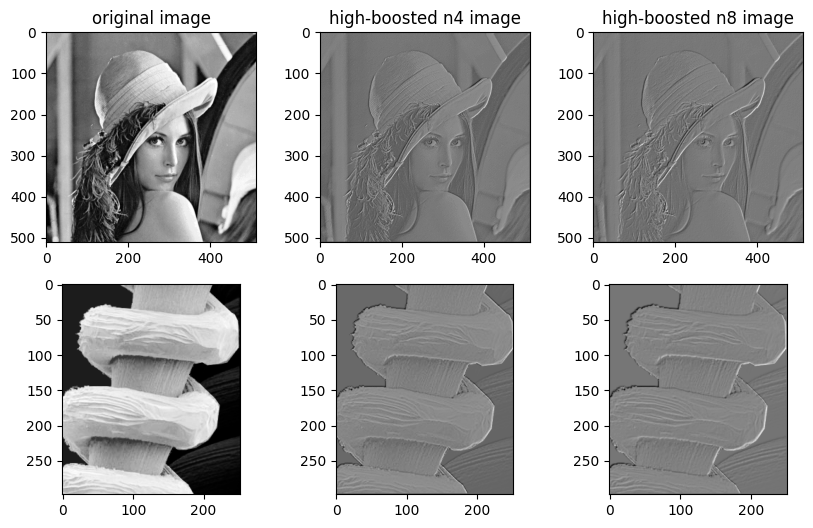

In [23]:
lena = cv2.imread('images/originals/lenna_color.bmp', cv2.IMREAD_GRAYSCALE)
tung = cv2.imread('images/tungsten.jpg', cv2.IMREAD_GRAYSCALE)

lena_hb_n4 = highboost_filter(lena, 1, mode='n4')
lena_hb_n8 = highboost_filter(lena, 1, mode='n8')
tung_hb_n4 = highboost_filter(tung, 1, mode='n4')
tung_hb_n8 = highboost_filter(tung, 1, mode='n8')

plt.figure(figsize=(10, 6))

plt.subplot(2, 3, 1)
plt.title('original image')
plt.imshow(lena, cmap='gray')

plt.subplot(2, 3, 2)
plt.title('high-boosted n4 image')
plt.imshow(lena_hb_n4, cmap='gray')

plt.subplot(2, 3, 3)
plt.title('high-boosted n8 image')
plt.imshow(lena_hb_n8, cmap='gray')

plt.subplot(2, 3, 4)
plt.imshow(tung, cmap='gray')

plt.subplot(2, 3, 5)
plt.imshow(tung_hb_n4, cmap='gray')

plt.subplot(2, 3, 6)
plt.imshow(tung_hb_n8, cmap='gray')

plt.show()